In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("Dataset-SA.csv")
df=pd.DataFrame(data)

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [4]:
data.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [5]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

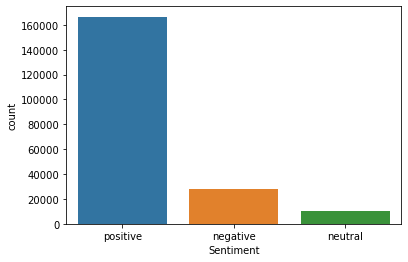

In [7]:
ax=sns.countplot(x='Sentiment',data=data)

# Data Extraction and Cleaning

In [8]:
data=data[data.Sentiment.isin(['neutral']) == False]
df=pd.DataFrame(data)

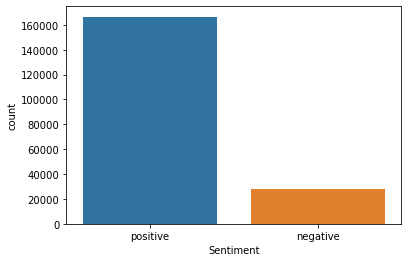

In [9]:
ax=sns.countplot(x='Sentiment',data=data)

In [10]:
data['Sentiment'].value_counts()

positive    166581
negative     28232
Name: Sentiment, dtype: int64

In [11]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           23236
Summary              6
Sentiment            0
dtype: int64

In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [14]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive


In [15]:
df=data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171572 entries, 0 to 205050
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   171572 non-null  object
 1   product_price  171572 non-null  object
 2   Rate           171572 non-null  object
 3   Review         171572 non-null  object
 4   Summary        171572 non-null  object
 5   Sentiment      171572 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


# Feature Extraction

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer()
feature_vector=count_vectorizer.fit(data.Review)
features=feature_vector.get_feature_names()
print("Total number of features: ",len(features))

Total number of features:  1257


C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
data_features=count_vectorizer.transform(data.Review)

In [18]:
data_features.shape

(171572, 1257)

In [19]:
data_features.getnnz()

336296

In [20]:
print("Density of the matrix: ",data_features.getnnz()*100 /  
    (data_features.shape[0]* data_features.shape[1]))

Density of the matrix:  0.15593370942227872


In [21]:
data_df=pd.DataFrame(data_features.todense())
data_df.columns=features

In [22]:
data[0:1]

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive


In [23]:
data_df.iloc[:1,150:157]

,beware,beyond,big,biggest,billion,bishnu,bit
0,0,0,0,0,0,0,0


In [24]:
features_counts=np.sum(data_features.toarray(),axis = 0)
features_counts_df=pd.DataFrame(dict(features=features,counts=features_counts))

Text(0, 0.5, 'Density')

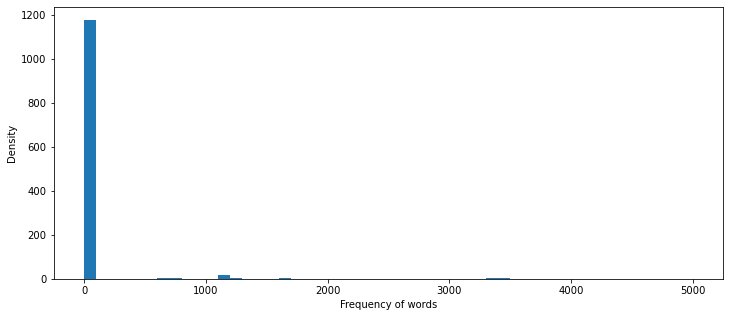

In [25]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts,bins=50,range=(0 ,5000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [26]:
len(features_counts_df[features_counts_df.counts == 1])

680

# Tokenization using CountVectorizer

In [27]:
count_vectorizer=CountVectorizer(max_features=10000)
feature_vector=count_vectorizer.fit(data.Review)
features=feature_vector.get_feature_names()
data_features=count_vectorizer.transform(data.Review)
features_counts=np.sum(data_features.toarray() , axis = 0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
feature_counts.sort_values('counts',ascending = False)[0:15]

,features,counts
882,product,28475
494,good,16156
110,awesome,11073
773,not,10860
892,purchase,10779
1105,terrific,10773
1110,the,10496
737,money,8866
1227,wonderful,8807
1237,worth,8788


# Identifying Stopwords

In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data['Review'][0:5]

0             super!
1            awesome
2               fair
3    useless product
5            awesome
Name: Review, dtype: object

In [31]:
count_vectorizer=CountVectorizer(stop_words=english_stop_words,max_features=10000)
feature_vector=count_vectorizer.fit(data.Review)
data_features=count_vectorizer.transform(data.Review)
features=feature_vector.get_feature_names()
features_counts=np.sum(data_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
feature_counts.sort_values("counts",ascending=False)[0:15]

,features,counts
824,product,28475
461,good,16156
99,awesome,11073
834,purchase,10779
1042,terrific,10773
694,money,8866
1145,wonderful,8807
1155,worth,8788
721,nice,8652
986,specified,7850


# Filtering Stemmed Non-Stop Words

In [33]:
from nltk.stem.snowball import PorterStemmer
stemmer=PorterStemmer()
analyzer=CountVectorizer().build_analyzer()
def stemmed_words(doc):
  stemmed_words=[stemmer.stem(w) for w in analyzer(doc)]
  non_stop_words=[word for word in stemmed_words ]
  return non_stop_words

In [34]:
count_vectorizer=CountVectorizer(analyzer=stemmed_words,max_features=10000)
feature_vector=count_vectorizer.fit(data.Review)
data_features=count_vectorizer.transform(data.Review)
features=feature_vector.get_feature_names()
features_counts=np.sum(data_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
feature_counts.sort_values("counts",ascending = False)[0:15]

,features,counts
798,product,28476
450,good,16156
107,awesom,11073
699,not,10860
806,purchas,10780
996,terrif,10773
1000,the,10496
665,money,8866
1107,wonder,8809
1114,worth,8789


# Model Building-BernoulliNB

In [36]:
data_df=pd.DataFrame(data_features.todense())
data_df.columns=features
data_df['Sentiment']=data.Sentiment

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)

In [39]:
from sklearn.naive_bayes import BernoulliNB
nb_clf1=BernoulliNB()
nb_clf1.fit(X_train.toarray(),Y_train)

BernoulliNB()

In [40]:
test_predicted=nb_clf1.predict(X_test.toarray())

In [41]:
from sklearn import metrics
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.91      0.76      0.83      4793
    positive       0.96      0.99      0.97     29522

    accuracy                           0.96     34315
   macro avg       0.94      0.87      0.90     34315
weighted avg       0.96      0.96      0.95     34315



<AxesSubplot:>

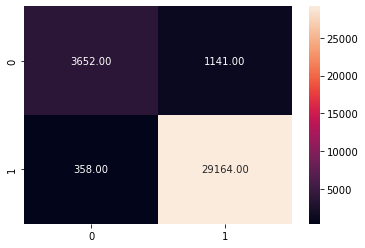

In [42]:
cm=metrics.confusion_matrix(Y_test,test_predicted)
sns.heatmap(cm,annot=True,fmt='.2f')

In [43]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 95.6316479673612%


# Model Building-GaussianNB with TfidfVectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(analyzer=stemmed_words,max_features = 10000)
feature_vector=tfidf_vectorizer.fit(data.Review)
data_features=tfidf_vectorizer.transform(data.Review)
features=feature_vector.get_feature_names()

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test=train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)

In [46]:
nb_clf2=GaussianNB()
nb_clf2.fit(X_train.toarray(),Y_train)

GaussianNB()

In [47]:
test_predicted=nb_clf2.predict(X_test.toarray())

In [48]:
from sklearn import metrics
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.14      1.00      0.25      4793
    positive       0.87      0.00      0.01     29522

    accuracy                           0.14     34315
   macro avg       0.50      0.50      0.13     34315
weighted avg       0.77      0.14      0.04     34315



<AxesSubplot:>

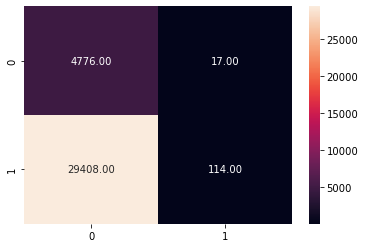

In [49]:
cm=metrics.confusion_matrix(Y_test,test_predicted)
sns.heatmap(cm,annot=True,fmt='.2f')

In [50]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 14.250327844965756%


# Model Building-BernoulliNB with TFidfVectorizer

In [51]:
from nltk.stem import PorterStemmer
import re
stemmer=PorterStemmer()
def get_stemmed_tokens(doc):
  all_tokens=[word for word in nltk.word_tokenize(doc)]
  clean_tokens=[]
  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
        clean_tokens.append(each_token)
  stemmed_tokens=[stemmer.stem(t) for t in clean_tokens]
  return stemmed_tokens

In [52]:
tfidf_vectorizer=TfidfVectorizer(stop_words ='english',max_features=10000,tokenizer=get_stemmed_tokens,ngram_range=(1,2))
feature_vector=tfidf_vectorizer.fit(data.Review)
data_features=tfidf_vectorizer.transform(data.Review)
features=feature_vector.get_feature_names()

C:\Program Files\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Program Files\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'the

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)
nb_clf3=BernoulliNB()
nb_clf3.fit(X_train.toarray(),Y_train)
test_predicted=nb_clf3.predict(X_test.toarray())
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.90      0.72      0.80      4793
    positive       0.96      0.99      0.97     29522

    accuracy                           0.95     34315
   macro avg       0.93      0.85      0.89     34315
weighted avg       0.95      0.95      0.95     34315



<AxesSubplot:>

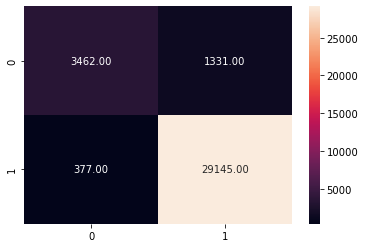

In [54]:
cm=metrics.confusion_matrix(Y_test,test_predicted)
sns.heatmap(cm,annot=True,fmt='.2f')

In [55]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 95.02258487541891%


In [56]:
data.Review

0                  super!
1                 awesome
2                    fair
3         useless product
5                 awesome
               ...       
205046     classy product
205047          must buy!
205048             super!
205049               nice
205050          just wow!
Name: Review, Length: 171572, dtype: object

In [57]:
X_test

<34315x3038 sparse matrix of type '<class 'numpy.float64'>'
	with 78863 stored elements in Compressed Sparse Row format>

In [58]:
data_features

<171572x3038 sparse matrix of type '<class 'numpy.float64'>'
	with 394118 stored elements in Compressed Sparse Row format>